In [72]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import sys
from matplotlib import rcParams
from operator import itemgetter
import subprocess as proc
import os
import shutil

#representation courbe de confiance des mots transcrits par paty 
#extraction des informations du fichier json de transcription par paty

In [63]:
#parameters
#exemple avec VITISPROHIBITAEXTRAIT4_asr_reco.json

transcripName = "VITISPROHIBITAEXTRAIT4_asr_reco.json"
audioName = "VITIS_PROHIBITA___EXTRAIT_4"

seuil = 0.5
extrait_range = 2

In [64]:
dossT = "patyTranscription/"
dossA = "audios\\" + audioName

nomfichier = dossT + transcripName
nomaudio = dossA + "\\" + audioName +".wav"


with open(nomfichier) as json_data:
    data_dict = json.load(json_data)
confidenceMoy = data_dict["confidence-score"]
words = data_dict["speakers"]
confSpk = []
data = [] #stock les data
for i in range(0, len(words)):
    temp = []
    for j in range(len(words[i]["words"])):
        words[i]["words"][j]["speaker"] = "spk" + str(i)
        data.append(words[i]["words"][j])
        temp.append(words[i]["words"][j]["conf"])
    confSpk.append(temp)

In [52]:
#mettre en ordre chronologique croissant par key "start" 
sortedtime = sorted(data, key=lambda d: d['start'])
listConf = []

listWord = []
listTime = []
abscisse = []
listT = []
for i in range(len(sortedtime)):
    listConf.append(sortedtime[i]["conf"])
    listWord.append(sortedtime[i]["word"])
    listTime.append( (sortedtime[i]["start"], sortedtime[i]["end"]) )
    listT.append(sortedtime[i]["start"])
    abscisse.append( str(listTime[i][0]) + "\n" + sortedtime[i]["speaker"] + ": " + str(listWord[i] ) )
    #print(abscisse[i])
    #print("\n")
#print(listConf)
#print(listWord)
#print(listTime)
npConf = np.array(listConf)
npWord = np.array(listWord)
npAbscisse = np.array(abscisse)
npTime = np.array(listTime)
npT = np.array(listT)

In [53]:
print(len(npWord))

131


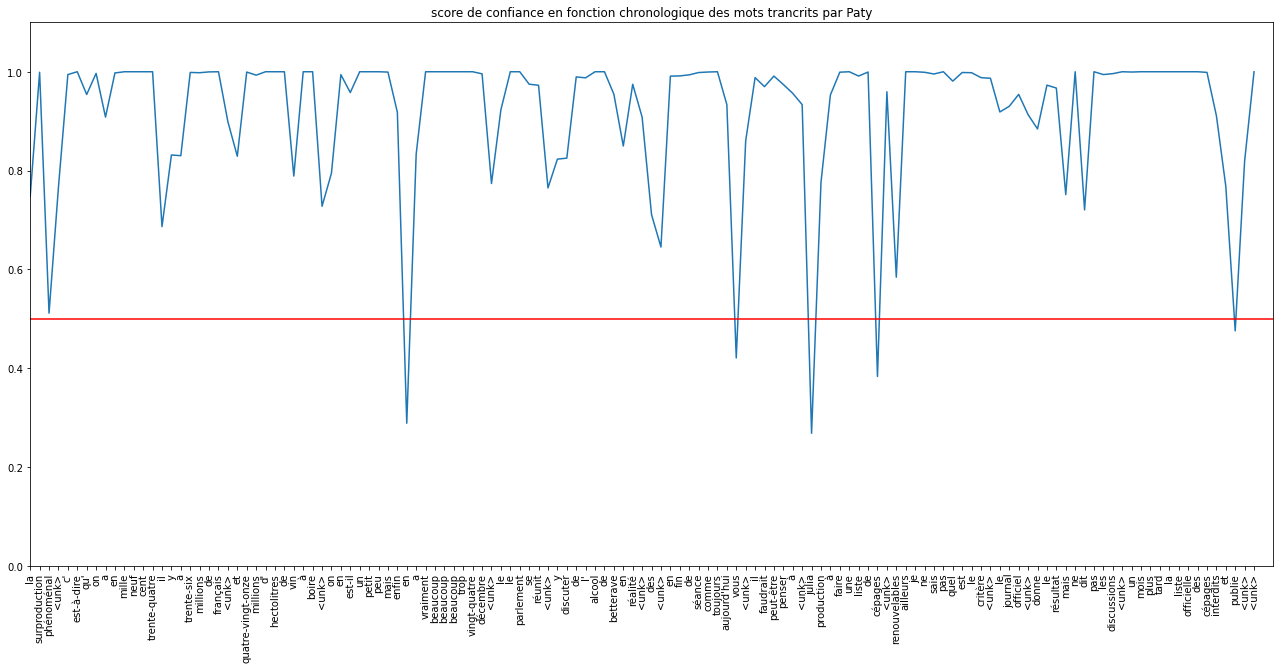

In [54]:
dimx = len(npConf) * 0.17
dimy = 10
plt.figure(figsize=(dimx, dimy))

plt.title("score de confiance en fonction chronologique des mots trancrits par Paty")
plt.plot(npConf)
plt.ylim(0,1.1)
plt.xlim(1,len(npConf)+1)
plt.xticks(range(len(npWord)), npWord, rotation = 90)
plt.axhline(y=seuil, xmin=0, xmax=1, color = "red", label ="seuil")
#plt.annotate('seuil', xy = (0, seuil), xytext = (0, seuil))
plt.show()

In [81]:
#display little audio extrait of speech under the "seuil"

#get all the word under seuil conf
oddwords = []
timers = [] #couple of time to get the timer extrait of oddword
oddspeakers = []
for element in sortedtime:
    if element["conf"] < seuil or element["word"] == "<unk>":
        oddwords.append("unk") if element["word"] == "<unk>" else oddwords.append(element["word"])
        start = round(element["start"] - extrait_range, 1) if element["start"] - extrait_range > 0 else 0
        end = round(element["end"] + extrait_range, 1)
        #add 2s of duration at debut and fin
        timers.append((start, end))
        oddspeakers.append( element["speaker"])
#print(timers)
#print(oddwords)
#print(oddspeakers)

unk


In [82]:
#create all oddaudio
tempdest = "odd_words_" + audioName
tempdir = "./" + tempdest
if (os.path.exists(tempdir)):
    shutil.rmtree(tempdir) #remove in order to clean before
os.mkdir(tempdir)
#create temp file for each audio 
#name struct : audioname_start_oddword_end_speaker.mp3
for index, (start, end)  in enumerate(timers):
    name = tempdest + "/" + "[" + str(start) + "]" + oddwords[index] + "[" + str(end) + "]" + oddspeakers[index] + ".mp3"
    #print(name)
    length = round(end - start,1)
    cmd = "ffmpeg -ss " + str(start) + " -t " + str(length) + " -i " +  "\"" + nomaudio + "\"" + " \"" + name + "\""
    print(cmd)
    proc.run(cmd, shell = True)

ffmpeg -ss 0 -t 4.2 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words_VITIS_PROHIBITA___EXTRAIT_4/[0]unk[4.2]spk0.mp3"
ffmpeg -ss 2.9 -t 4.4 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words_VITIS_PROHIBITA___EXTRAIT_4/[2.9]unk[7.3]spk0.mp3"
ffmpeg -ss 6.4 -t 4.6 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words_VITIS_PROHIBITA___EXTRAIT_4/[6.4]unk[11.0]spk0.mp3"
ffmpeg -ss 8.6 -t 4.1 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words_VITIS_PROHIBITA___EXTRAIT_4/[8.6]en[12.7]spk0.mp3"
ffmpeg -ss 11.5 -t 4.4 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words_VITIS_PROHIBITA___EXTRAIT_4/[11.5]unk[15.9]spk0.mp3"
ffmpeg -ss 14.0 -t 4.2 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words_VITIS_PROHIBITA___EXTRAIT_4/[14.0]unk[18.2]spk0.mp3"
ffmpeg -ss 16.7 -t 4.5 -i "audios\VITIS_PROHIBITA___EXTRAIT_4

11.27

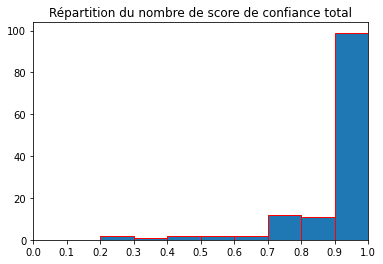

In [6]:
#affichage histogramme (nb de score en tranche seuil de 0.1)
plt.hist(npConf, range= (0, 1), bins = 10, edgecolor = 'red')
plt.title("Répartition du nombre de score de confiance total")
histox = 15
histoy = 10
plt.xlim(0,1)
abx = np.arange(0, 1.1, 0.1)
plt.xticks(abx)
plt.show()

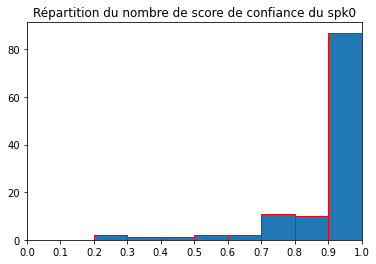

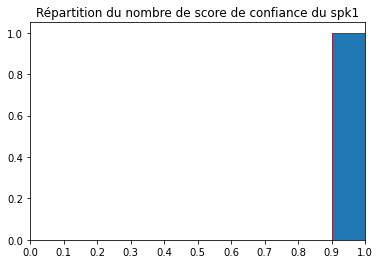

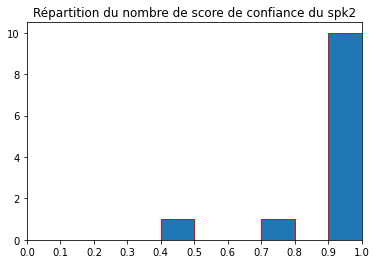

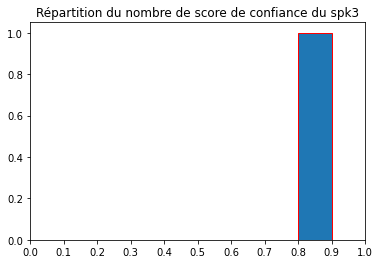

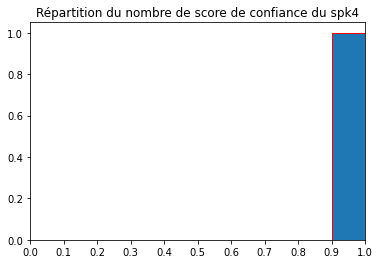

In [7]:
for i in range(len(confSpk)):
    plt.hist(confSpk[i], range= (0, 1), bins = 10, edgecolor = 'red')
    plt.title("Répartition du nombre de score de confiance du spk" + str(i))
    histox = 15
    histoy = 10
    plt.xlim(0,1)
    abx = np.arange(0, 1.1, 0.1)
    plt.xticks(abx)
    plt.show()

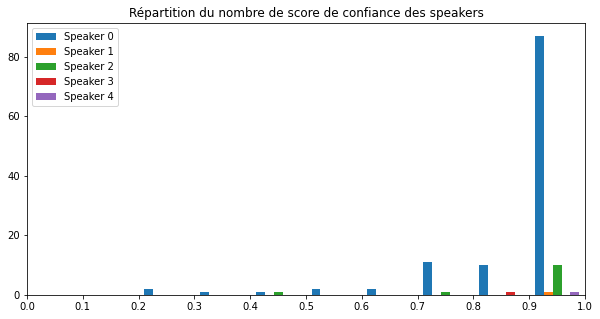

In [38]:
#confSpk[]
#bins = np.linspace(0, 1)
plt.figure(figsize=(len(confSpk) * 2, dimy / 2 ))
plt.hist(confSpk,  range= (0, 1), bins = 10, label = ["Speaker " + str(i) for i in range(len(confSpk))])
plt.legend(loc='upper left')
plt.title("Répartition du nombre de score de confiance des speakers")
plt.xlim(0,1)
abx = np.arange(0, 1.1, 0.1)

plt.xticks(abx)
plt.show()